In [1]:
import pandas as pd
stock_data = pd.read_csv('Netflix_Dataset.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
04-03-2019,359.72,362.25,348.04,351.04,"74,86,996"
05-03-2019,351.46,356.17,348.25,354.30,"59,37,754"
06-03-2019,353.60,359.88,351.70,359.61,"62,11,895"
07-03-2019,360.16,362.86,350.50,352.60,"61,51,331"
08-03-2019,345.75,349.92,342.47,349.60,"68,98,838"


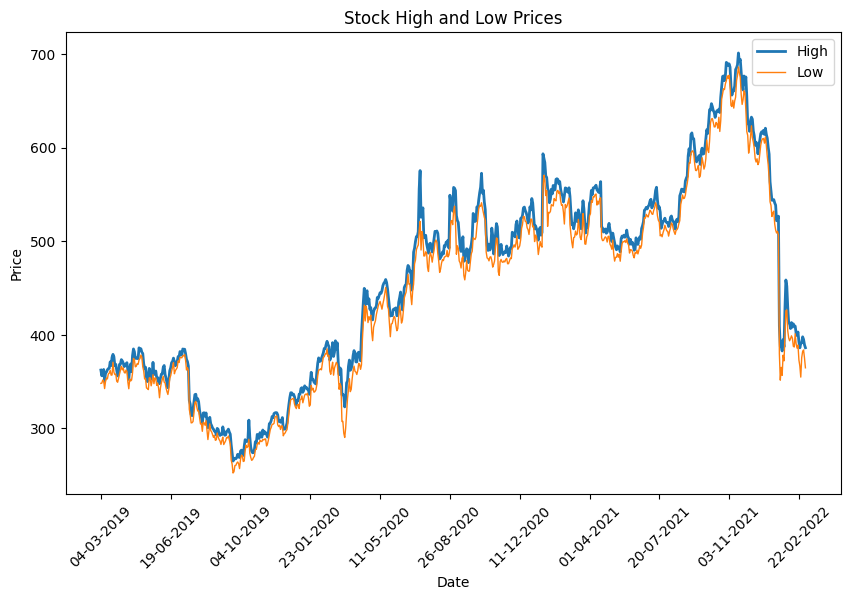

In [2]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['High'], label='High', linewidth=2)
plt.plot(stock_data['Low'], label='Low', linewidth=1)

# Adding labels and title
plt.title('Stock High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot
plt.show()


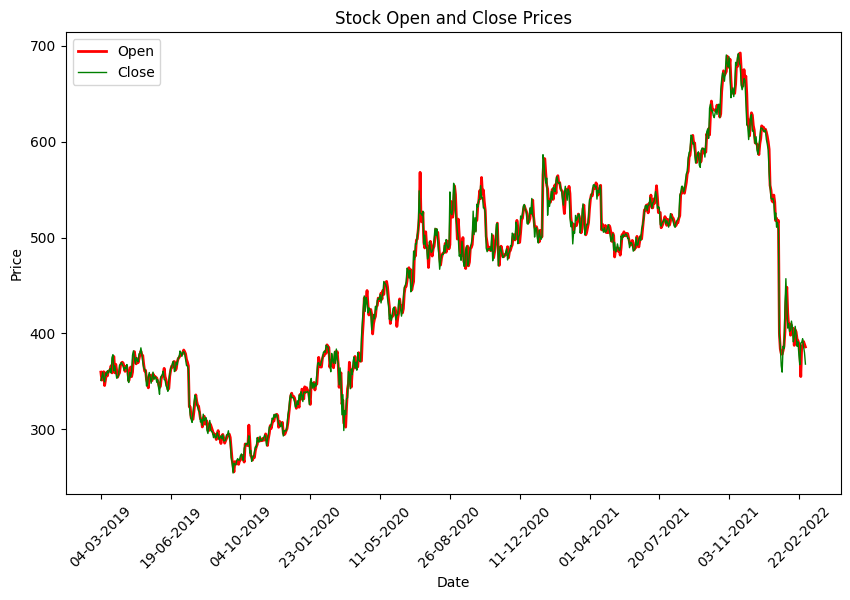

In [3]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Open'], label='Open', color='red', linewidth=2)
plt.plot(stock_data['Close'], label='Close', color='green', linewidth=1)

# Adding labels and title
plt.title('Stock Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot
plt.show()


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

In [5]:
#Data Preprocessing

target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

In [6]:
#Feature Scaling
sc = StandardScaler()
stock_data_ft = sc.fit_transform(stock_data.values)
stock_data_ft = pd.DataFrame(columns=stock_data.columns,
                            data=stock_data_ft,
                            index=stock_data.index)

In [7]:
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        # Extract a window of size `n_steps` for features
        X.append(data[i:i + n_steps, :-1])  # All but last column
        # Extract the `n_steps`-th target value
        y.append(data[i + n_steps - 1, -1])  # Target value (last column)
    return np.array(X), np.array(y)


In [8]:
X1, y1 = lstm_split(stock_data_ft.values, n_steps=1)
train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1. shape, X_train. shape, X_test.shape, y_test.shape)


(757, 1, 3) (606, 1, 3) (151, 1, 3) (151,)


In [9]:
# Define LSTM Model
lstm = Sequential()

# LSTM Layer (Set return_sequences=False if you want one output per sample)
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Output Layer
lstm.add(Dense(1))

# Compile the Model
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print Model Summary
lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1)           │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/100
121/121 - 3s - 22ms/step - loss: 0.6566 - val_loss: 0.2207
Epoch 2/100
121/121 - 0s - 3ms/step - loss: 0.2172 - val_loss: 0.0160
Epoch 3/100
121/121 - 0s - 3ms/step - loss: 0.0148 - val_loss: 0.0085
Epoch 4/100
121/121 - 0s - 3ms/step - loss: 0.0126 - val_loss: 0.0084
Epoch 5/100
121/121 - 0s - 3ms/step - loss: 0.0124 - val_loss: 0.0085
Epoch 6/100
121/121 - 0s - 3ms/step - loss: 0.0123 - val_loss: 0.0086
Epoch 7/100
121/121 - 0s - 3ms/step - loss: 0.0122 - val_loss: 0.0087
Epoch 8/100
121/121 - 0s - 3ms/step - loss: 0.0122 - val_loss: 0.0087
Epoch 9/100
121/121 - 0s - 3ms/step - loss: 0.0121 - val_loss: 0.0088
Epoch 10/100
121/121 - 1s - 5ms/step - loss: 0.0121 - val_loss: 0.0088
Epoch 11/100
121/121 - 0s - 3ms/step - loss: 0.0121 - val_loss: 0.0088
Epoch 12/100
121/121 - 1s - 5ms/step - loss: 0.0121 - val_loss: 0.0088
Epoch 13/100
121/121 - 1s - 4ms/step - loss: 0.0120 - val_loss: 0.0087
Epoch 14/100
121/121 - 0s - 4ms/step - loss: 0.0120 - val_loss: 0.0087
Epoch 15/100
1

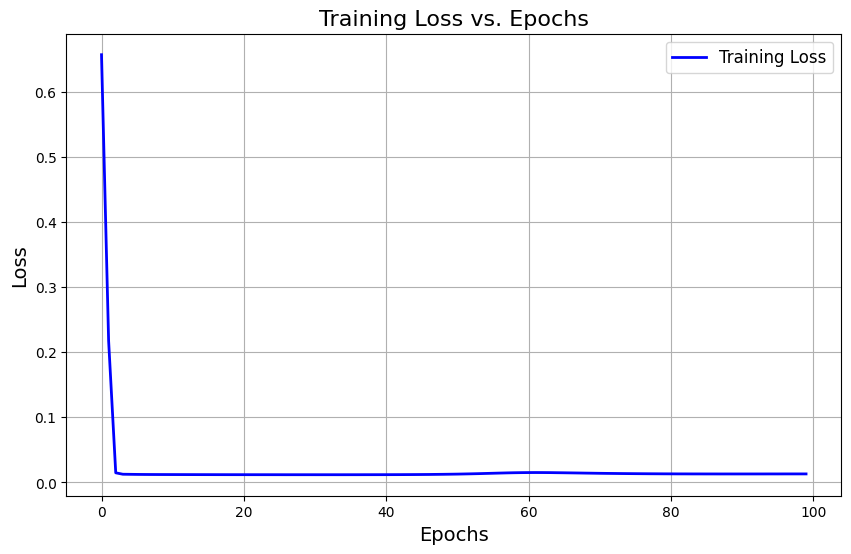

In [11]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [12]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [14]:
print(y_pred.shape)

(151, 1, 1)


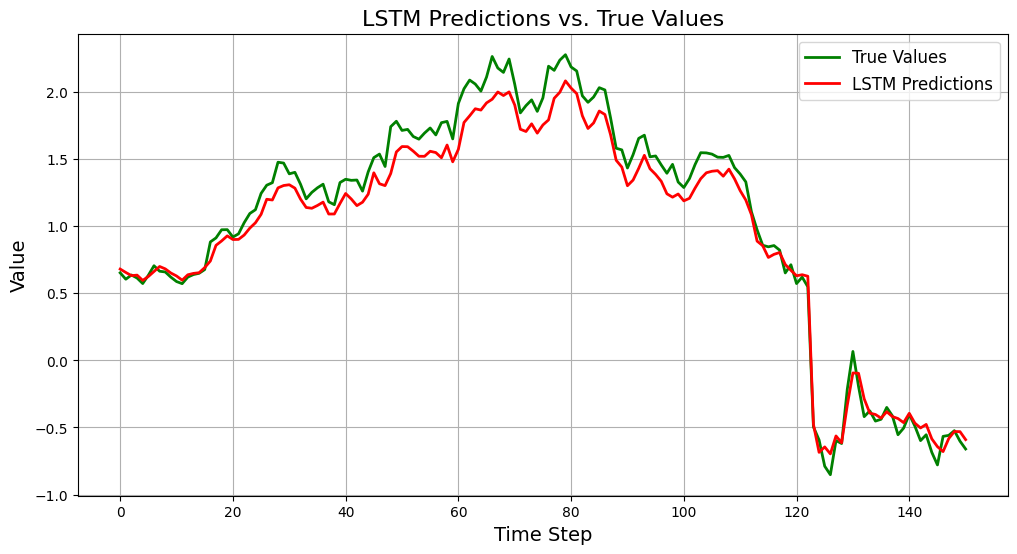

In [15]:
#If n = 1

import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()
y_pred_flat = y_pred.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred_flat, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [16]:
print(y_test.shape)

(151,)


In [17]:
mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_flat)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.13986323491024497
MAPE:  0.1100672262287424


#Deeper LSTM with 50 units per layer


In [18]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
152/152 - 6s - 37ms/step - loss: 0.7019
Epoch 2/100
152/152 - 1s - 4ms/step - loss: 0.0661
Epoch 3/100
152/152 - 1s - 4ms/step - loss: 0.0220
Epoch 4/100
152/152 - 1s - 4ms/step - loss: 0.0181
Epoch 5/100
152/152 - 1s - 4ms/step - loss: 0.0156
Epoch 6/100
152/152 - 1s - 4ms/step - loss: 0.0137
Epoch 7/100
152/152 - 1s - 4ms/step - loss: 0.0123
Epoch 8/100
152/152 - 1s - 4ms/step - loss: 0.0112
Epoch 9/100
152/152 - 2s - 10ms/step - loss: 0.0102
Epoch 10/100
152/152 - 1s - 5ms/step - loss: 0.0095
Epoch 11/100
152/152 - 1s - 4ms/step - loss: 0.0089
Epoch 12/100
152/152 - 1s - 4ms/step - loss: 0.0083
Epoch 13/100
152/152 - 1s - 4ms/step - loss: 0.0078
Epoch 14/100
152/152 - 1s - 4ms/step - loss: 0.0073
Epoch 15/100
152/152 - 1s - 4ms/step - loss: 0.0069
Epoch 16/100
152/152 - 1s - 4ms/step - loss: 0.0065
Epoch 17/100
152/152 - 1s - 4ms/step - loss: 0.0062
Epoch 18/100
152/152 - 1s - 4ms/step - loss: 0.0059
Epoch 19/100
152/152 - 1s - 4ms/step - loss: 0.0056
Epoch 20/100
152/15

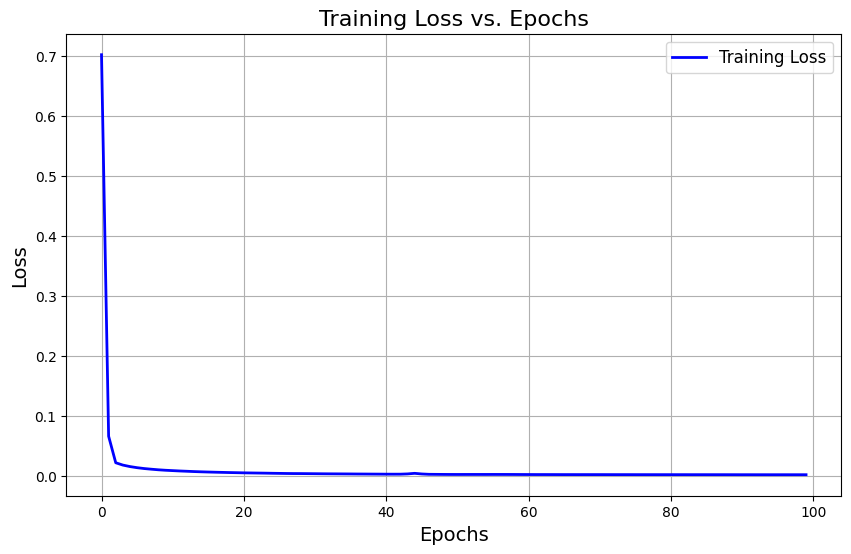

In [20]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [21]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


In [22]:
print(y_pred.shape)

(151, 1)


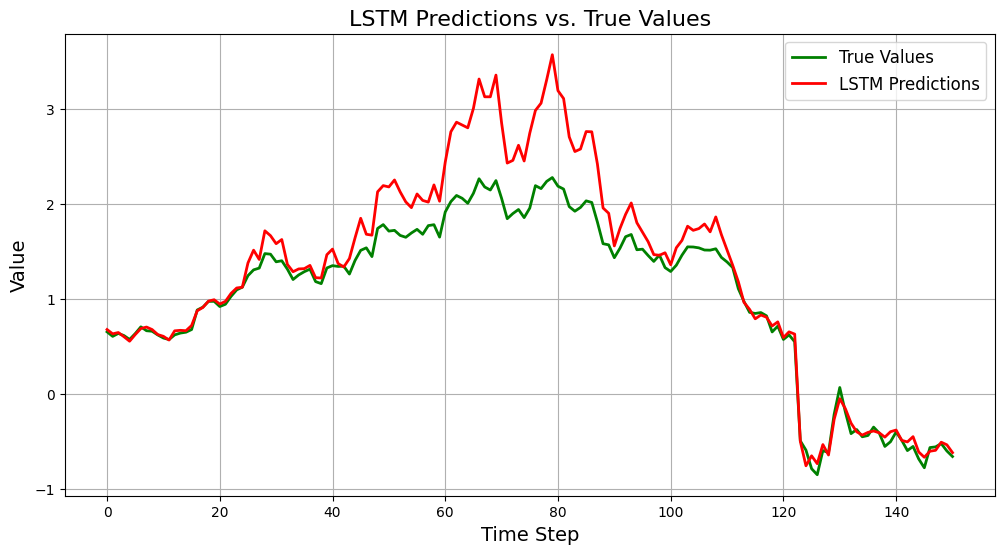

In [23]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [24]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.39121156194035483
MAPE:  0.16636932940806318


#Number of steps increased to 10


In [25]:
n_steps=10
X1, y1 = lstm_split(stock_data_ft.values, n_steps=n_steps)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)

(748, 10, 3) (599, 10, 3) (149, 10, 3) (149,) (149,)


In [26]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
150/150 - 7s - 49ms/step - loss: 0.2071
Epoch 2/100
150/150 - 2s - 11ms/step - loss: 0.0622
Epoch 3/100
150/150 - 2s - 11ms/step - loss: 0.0419
Epoch 4/100
150/150 - 2s - 17ms/step - loss: 0.0374
Epoch 5/100
150/150 - 2s - 11ms/step - loss: 0.0362
Epoch 6/100
150/150 - 2s - 16ms/step - loss: 0.0335
Epoch 7/100
150/150 - 2s - 14ms/step - loss: 0.0318
Epoch 8/100
150/150 - 2s - 11ms/step - loss: 0.0292
Epoch 9/100
150/150 - 2s - 13ms/step - loss: 0.0270
Epoch 10/100
150/150 - 2s - 15ms/step - loss: 0.0238
Epoch 11/100
150/150 - 2s - 11ms/step - loss: 0.0212
Epoch 12/100
150/150 - 2s - 14ms/step - loss: 0.0188
Epoch 13/100
150/150 - 3s - 17ms/step - loss: 0.0158
Epoch 14/100
150/150 - 2s - 11ms/step - loss: 0.0147
Epoch 15/100
150/150 - 2s - 11ms/step - loss: 0.0133
Epoch 16/100
150/150 - 2s - 11ms/step - loss: 0.0116
Epoch 17/100
150/150 - 2s - 11ms/step - loss: 0.0101
Epoch 18/100
150/150 - 2s - 11ms/step - loss: 0.0094
Epoch 19/100
150/150 - 2s - 16ms/step - loss: 0.0092
Ep

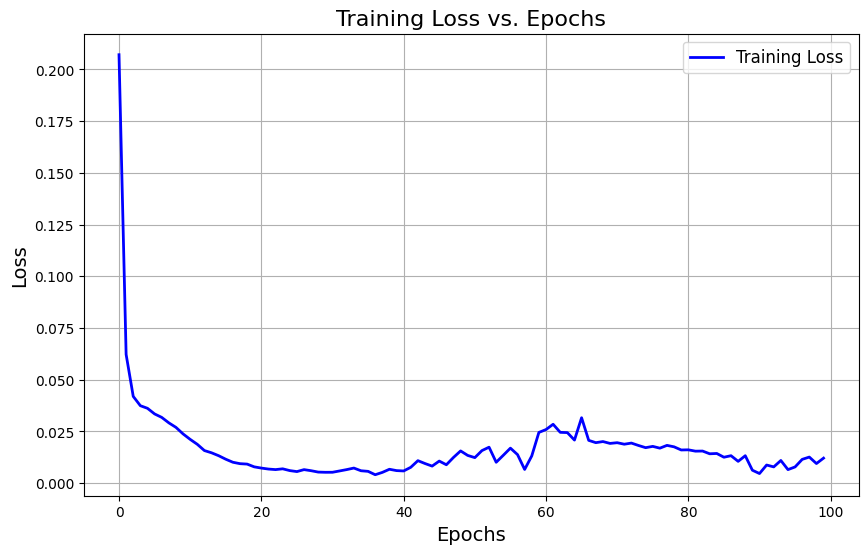

In [28]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [29]:
y_pred = lstm.predict(X_test)

1/5 ━━━━━━━━━━━━━━━━━━━━ 2s 708ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step


In [30]:
print(y_pred.shape)

(149, 1)


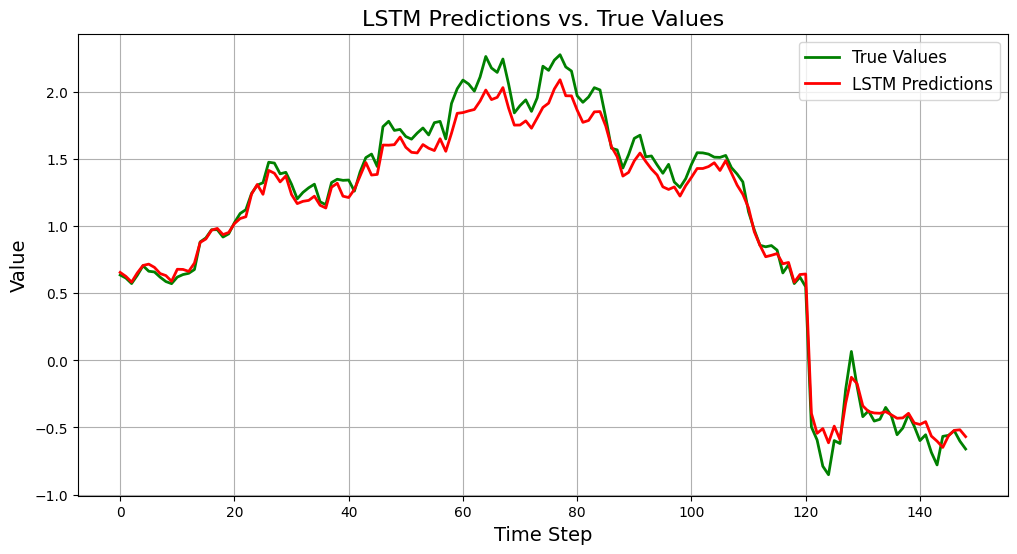

In [31]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.11304598834591392
MAPE:  0.09278878489049017


# Comparison with SMA and EMA

###SMA

Test RMSE: 100.354
Test MAPE: 0.163


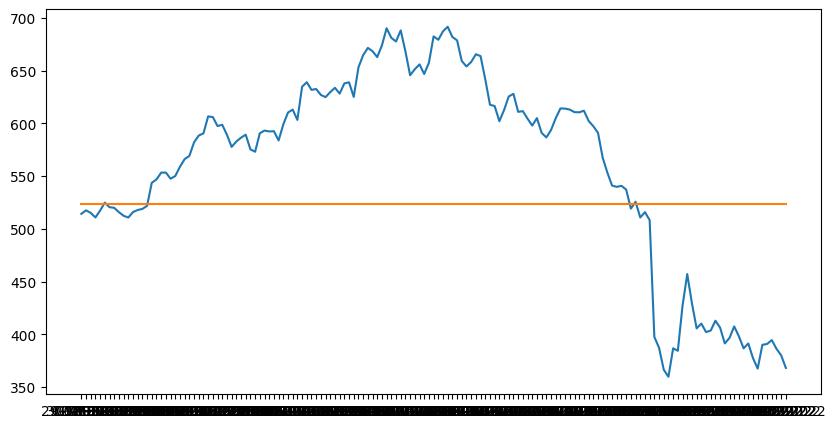

In [33]:
train_split = 0.8
split_idx = int(np.ceil(len(stock_data)*train_split))
train = stock_data[['Close']].iloc[:split_idx]
test = stock_data[['Close']].iloc[split_idx:]

test_pred = np.array([train.rolling(10).mean().iloc[-1]]*len(test)).reshape((-1,1))

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_pred)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_pred))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_pred)
plt.show()

###EMA

/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

Test RMSE: 100.244
Test MAPE: 0.163


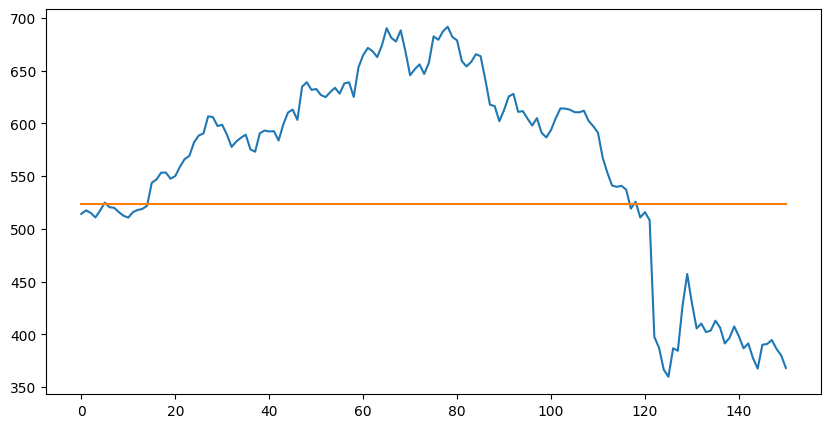

In [34]:
from statsmodels.tsa.api import SimpleExpSmoothing

X = stock_data[['Close']].values
train_split = 0.8
split_idx = int(np.ceil(len(X)*train_split))
train = X[:split_idx]
test = X[split_idx:]
test_concat = np.array([]).reshape((0,1))

for i in range(len(test)):
  train_fit = np.concatenate((train, np.asarray(test_concat)))
  fit = SimpleExpSmoothing(np.asarray(train_fit)).fit(smoothing_level=0.1)
  test_pred = fit.forecast(1)
  test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))

# The change is here: Using test_concat instead of test_pred for RMSE calculation
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_concat)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_concat)
plt.show()

###A Different Averaging

Test RMSE: 12.672
Test MAPE: 0.019


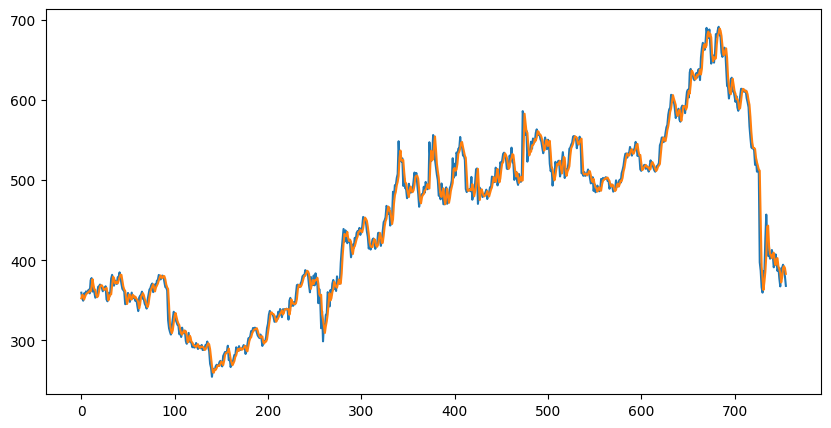

In [35]:
X = stock_data[['Close']].values
time_steps = 2

history = [X[i] for i in range(time_steps)]
ytest = [X[i] for i in range(time_steps, len(X))]
ypred_list = []

for t in range(len(ytest)):
	ypred = np.mean([history[i] for i in range(len(history)-time_steps,len(history))])
	ypred_list.append(ypred)
	history.append(ytest[t])

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(ytest, ypred_list)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(ytest, ypred_list))

plt.figure(figsize=(10,5))
plt.plot(ytest)
plt.plot(ypred_list)
plt.show()